In [1]:
using PyPlot

In [3]:
# Generate some data
srand(5)
n = 1000
d = 10
k = 4
X = randn(n, d)
w_true = [-5, 17, 5, 0, 0, -7, 5, 0, 0, 0.1]
y = X*w_true + .1*randn(n);

d) Code the proximal gradient method for the Sparse Least Squares Problem.

In [4]:
function prox_sparse(x::Array, k)
    
    w = zeros(length(x)) 
    
    temp_z = zeros(size(x,1)) 
       
    for i in 1:size(x,1)
        temp_z[i] = abs(x[i])
    end
    
    for j in 1:k
        position = indmax(temp_z)
        temp_z[position] = -Inf
    end  
    
    
    for j in 1:(size(x,1))
        if (temp_z[j]==-Inf)
            w[j] = x[j]
        else
            w[j] = 0
        end    
    end
    
    return w
end

prox_sparse (generic function with 1 method)

In [6]:
#test cases
@show prox_sparse([0,1,2,-3,1],2)
@show prox_sparse([1, 1,1,1],2)
@show prox_sparse([0, 1,-3,1],2)
@show prox_sparse([-4, -3,-2,1],2)

prox_sparse([0,1,2,-3,1],2) = [0.0,0.0,2.0,-3.0,0.0]
prox_sparse([1,1,1,1],2) = [1.0,1.0,0.0,0.0]
prox_sparse([0,1,-3,1],2) = [0.0,1.0,-3.0,0.0]
prox_sparse([-4,-3,-2,1],2) = [-4.0,-3.0,0.0,0.0]


4-element Array{Float64,1}:
 -4.0
 -3.0
  0.0
  0.0

In [7]:
function proxgrad_sparse(X, y, k; maxiters = 100, stepsize = 1, w = zeros(size(X,2)))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w - y) # compute quadratic gradient
        w = w - stepsize*g
        
        # prox step
        w = prox(w, k)
        # record objective value
        push!(objval, norm(X*w-y)^2) 
    end
    return w, objval
end

proxgrad_sparse (generic function with 1 method)

Any, Any, Any) in module Main at In[5]:2 overwritten at In[7]:2.


In [8]:
# find step size
u, s, v = svd(X)
@show s
L = 2*(s[1]^2)
@show 1/L

s = [33.4927,33.0143,32.2096,31.9739,31.2261,30.8073,30.5381,30.0773,29.7695,28.2891]
1 / L = 0.00044572823379351276


0.00044572823379351276

In [83]:
solution_sparse, objectives = proxgrad_sparse(X,y,k, stepsize =0.0004)
#w_true = [-5.0,17.0,5.0,0.0,0.0,-7.0,5.0,0.0,0.0,0.1]
@show solution_sparse
@show objectives[end]

solution_sparse = [-4.88689,16.929,0.0,0.0,0.0,-6.81002,5.04232,0.0,0.0,0.0]
objectives[end] = 23570.851949516178


23570.851949516178

d) Plot the objective value as a function of the number of iterations.

About 65 iterations are needed.

(num_iterations,lastobj) = (1,350537.95960107003)
(num_iterations,lastobj) = (1,2.8577959466822096e6)
(num_iterations,lastobj) = (1,493913.55339145416)
(num_iterations,lastobj) = (1,1.825938758582889e6)
(num_iterations,lastobj) = (2,2.212884097686266e6)
(num_iterations,lastobj) = (2,666300.9363444085)
(num_iterations,lastobj) = (2,5.104939216976175e6)
(num_iterations,lastobj) = (2,2.6472789723096853e6)
(num_iterations,lastobj) = (3,391423.35475737083)
(num_iterations,lastobj) = (3,548236.6308462017)
(num_iterations,lastobj) = (3,933062.2576463139)
(num_iterations,lastobj) = (4,675076.1975673223)
(num_iterations,lastobj) = (4,1.3549449912011626e6)
(num_iterations,lastobj) = (4,633580.2528609488)
(num_iterations,lastobj) = (5,540415.5168096826)
(num_iterations,lastobj) = (6,309161.260616843)
(num_iterations,lastobj) = (6,247143.26914927323)
(num_iterations,lastobj) = (7,297902.6747834074)
(num_iterations,lastobj) = (8,164929.52187399368)
(num_iterations,lastobj) = (9,1.0549498359153604e6

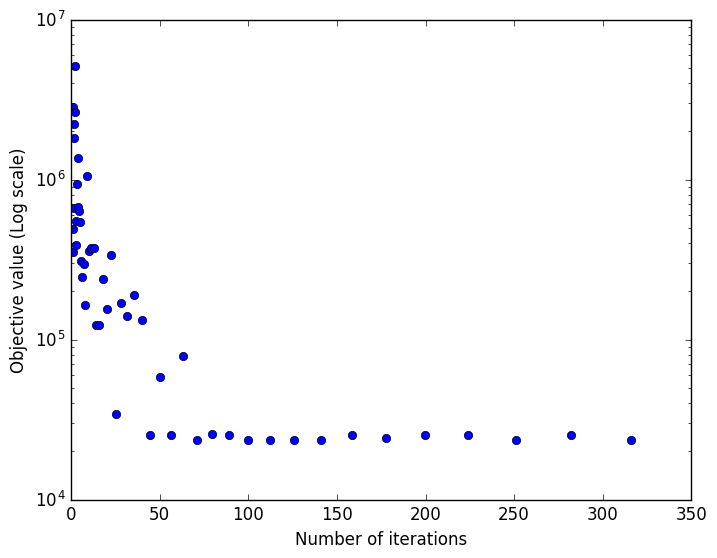

(num_iterations,lastobj) = (316,23570.851949516178)


PyObject <matplotlib.text.Text object at 0x000000001CCD6630>

  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\User\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\User\.julia\v0.5\PyCall\sr

In [10]:
# plot against the number of iterations
for i in collect(0:0.05:2.5)
    lastobj = proxgrad_sparse(X,y,k, maxiters=10^i, stepsize =0.00004, w = randn(size(X,2))*rand(1:20))[2][end]
    semilogy(10^i, lastobj, "bo")
    num_iterations =  convert(Int,round(10^i))
    @show num_iterations, lastobj
end
xlabel("Number of iterations")
ylabel("Objective value (Log scale)")

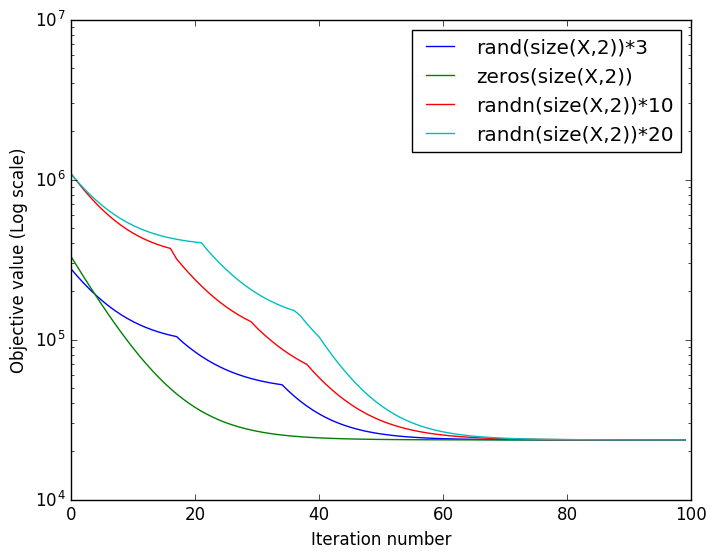

PyObject <matplotlib.text.Text object at 0x0000000020BE4080>

In [13]:
# plot against the iteration number
semilogy(proxgrad_sparse(X,y,k, maxiters=100, stepsize =0.00004, w = rand(size(X,2))*3)[2], label="rand(size(X,2))*3")
semilogy(proxgrad_sparse(X,y,k, maxiters=100, stepsize =0.00004, w = zeros(size(X,2)))[2],label="zeros(size(X,2))")
semilogy(proxgrad_sparse(X,y,k, maxiters=100, stepsize =0.00004, w = randn(size(X,2))*10)[2],label="randn(size(X,2))*10")
semilogy(proxgrad_sparse(X,y,k, maxiters=100, stepsize =0.00004, w = randn(size(X,2))*20)[2],label = "randn(size(X,2))*20")
legend()
xlabel("Iteration number")
ylabel("Objective value (Log scale)")

The method finds a solution quite slowly and converges to the same value with about 65 iterations. However, the objective values are very high with a magnitude of 10^4, which suggests that the solution is far away from the actual value.

e) Run the algorithm starting at multiple locations and create a histogram of the objective value. Use 100 iterations for each run.

In [59]:
last_objectives = Float64[]
for i in 1:100
    temp = randn(size(X,2))*rand(1:20) # start at different initial weights
    objective = proxgrad_sparse(X,y,k, maxiters=100, stepsize =0.00004, w = temp)[2][end]
    push!(last_objectives, objective)
end
@show mean(last_objectives)

mean(last_objectives) = 24356.845216623155


24356.845216623155

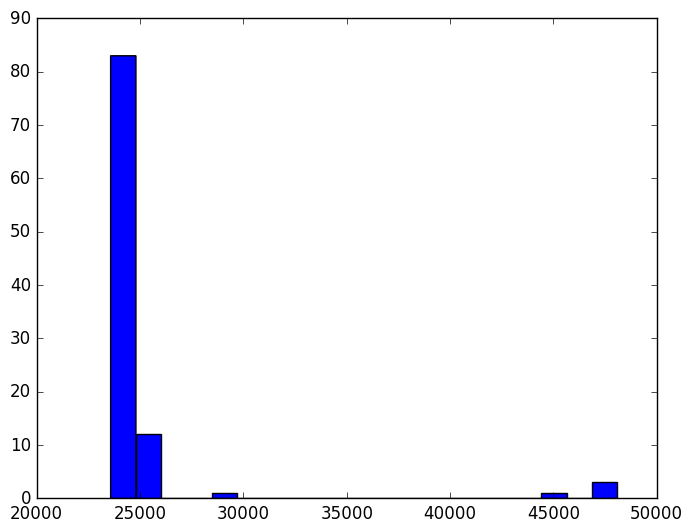

([83.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0],[23570.9,24796.7,26022.4,27248.2,28474.0,29699.7,30925.5,32151.3,33377.0,34602.8  …  37054.3,38280.1,39505.9,40731.6,41957.4,43183.2,44408.9,45634.7,46860.4,48086.2],Any[PyObject <matplotlib.patches.Rectangle object at 0x0000000020C04CF8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C085C0>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C08EB8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C0D7B8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C0DEB8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C11978>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C16240>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C16B38>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C1A400>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C1ACF8>,PyObject <matplotlib.patches.Rectangle object at 0x0000

In [15]:
plt[:hist](last_objectives,20)

The histogram shows that there is likely to be multiple solutions, because the indicator function is not convex.

f) Run LASSO regression using the proximal gradient method on this problem. You may use the code from the demo in class.

In [16]:
function prox_l1(x::Number, alpha=1) #alpha is the regularisation term
    if x > alpha
        return x-alpha
    elseif x < -alpha
        return x + alpha
    else
        return 0
    end
end
function prox_l1(x::AbstractArray, alpha=1)
    return reshape(Float64[prox_l1(xi, alpha) for xi in x], size(x))
end

prox_l1 (generic function with 4 methods)

In [17]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l1(X, y; maxiters = 10, stepsize = 0.0007, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w-y) # compute quadratic gradient
        w = w - stepsize*g
       
        # prox step
        w = prox_l1(w, stepsize*λ)
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1)) # norm is default l2 unless stated otherwise
    end
    return w, objval
end

proxgrad_quad_l1 (generic function with 1 method)

In [18]:
solution_lasso, objval = proxgrad_quad_l1(X,y)
@show solution_lasso
@show w_true
@show objval[end]

solution_lasso = [-5.00016,16.9959,5.00229,0.0,-0.00506076,-6.99852,4.98906,-0.0155687,0.0033221,0.0982208]
w_true = [-5.0,17.0,5.0,0.0,0.0,-7.0,5.0,0.0,0.0,0.1]
objval[end] = 49.182400828058036


49.182400828058036

g) Does LASSO converge to the same place starting from different places?

In [20]:
last_objectives = Float64[]
weights = zeros(100,d)
for i in 1:100
    temp = randn(size(X,2))*rand(1:20) # start from different initial weights
    
    solution, objective = proxgrad_quad_l1(X,y, maxiters=100, stepsize =0.0004, w = temp)
    for j in 1:d
        weights[i,j] = solution[j]
    end
    push!(last_objectives, objective[end])
end

In [23]:
avg_solution_lasso = Float64[]
for i in 1:d
    push!(avg_solution_lasso, mean(weights[:,i]))
end
@show solution_lasso
avg_solution_lasso # answers are very close

solution_lasso = [-5.00016,16.9959,5.00229,0.0,-0.00506076,-6.99852,4.98906,-0.0155687,0.0033221,0.0982208]


10-element Array{Float64,1}:
 -5.00244    
 16.9969     
  5.00171    
 -0.00105169 
  0.000413082
 -7.00314    
  5.00029    
 -0.00704684 
  0.0025879  
  0.0995847  

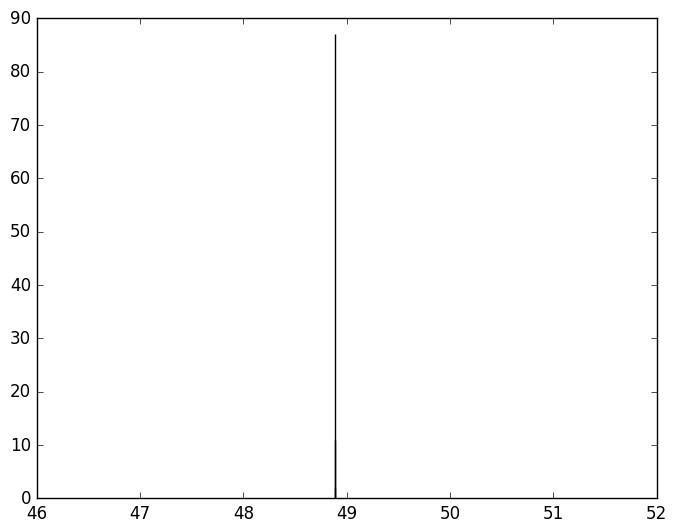

([0.0,2.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0],[48.8824,48.8824,48.8824,48.8824,48.8824,48.8824,48.8824,48.8824,48.8824,48.8824,48.8824],Any[PyObject <matplotlib.patches.Rectangle object at 0x0000000020C24AC8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C2B1D0>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C2BA90>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C31358>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C31A58>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C35160>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C35A20>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C3C2E8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C3C9E8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000020C420F0>])

In [24]:
plt[:hist](last_objectives,10)

From the average value of the weights and from the histogram, LASSO converges to the same value regardless of the starting point.

h) Compare the sparse least-squares solution with the LASSO solution. Which is more sparse? Which achieves a better objective value? Which method is more reliable?

In [25]:
@show solution_sparse
@show solution_lasso

mse_sparse = mean((solution_sparse.-w_true).^2)
mse_lasso = mean((solution_lasso.-w_true).^2)

@show mse_sparse
@show mse_lasso
@show w_true

@show objval[end]

solution_sparse = [-4.88689,16.929,0.0,0.0,0.0,-6.81002,5.04232,0.0,0.0,0.0]
solution_lasso = [-5.00016,16.9959,5.00229,0.0,-0.00506076,-6.99852,4.98906,-0.0155687,0.0033221,0.0982208]
mse_sparse = 2.5065722263506935
mse_lasso = 4.259804062790137e-5
w_true = [-5.0,17.0,5.0,0.0,0.0,-7.0,5.0,0.0,0.0,0.1]
objval[end] = 49.182400828058036


49.182400828058036

The SLS solution is more sparse.
LASSO achieves a much better objective value, at about 50.
LASSO method gives a more reliable solution as the mean squared error is much lower (close to 0).

# Question 3

b) Code the stochastic proximal gradient method for the Sparse Least Squares problem.

In [27]:
function prox_stochgrad_sparse(X, y, k; maxiters = 100, stepsize = 1, w = zeros(size(X,2)), num_samples = 10)
    objval = Float64[]
    
    sample = zeros(num_samples)
    x_sample = zeros(num_samples, size(X,2))
    y_sample = zeros(num_samples)
   
    for i=1:maxiters
        
        shuffle_array = shuffle(collect(1:size(X,1))) # sample is calculated at EACH iteration
    
        sample[1:num_samples] = shuffle_array[1:num_samples]

 
        for j in 1:num_samples
            for k in 1:size(X,2)
                x_sample[j,k] = X[convert(Int,sample[j]),k]
            end
                y_sample[j] = y[convert(Int, sample[j])]
        end
        
        # gradient step
        g = 2*n/num_samples*x_sample'*(x_sample*w-y_sample) # compute quadratic gradient

        w = w - stepsize*g
        
        # prox step
        w = prox_sparse(w, k)
        
        # record objective value
        push!(objval, norm(x_sample*w-y_sample)^2) 
        
       
    end
    return w, objval
end

prox_stochgrad_sparse (generic function with 1 method)

Any, Any, Any) in module Main at In[26]:2 overwritten at In[27]:2.


c) Using the same data as in problem 2, plot the objective value as a function of the number of iterations.

(num_iterations,lastobj) = (1,1017.6517016847858)
(num_iterations,lastobj) = (1,2104.8289811379395)
(num_iterations,lastobj) = (2,464.1002233621602)
(num_iterations,lastobj) = (2,1233.9550686082944)
(num_iterations,lastobj) = (3,217.06602386193762)
(num_iterations,lastobj) = (3,480.6955016545623)
(num_iterations,lastobj) = (4,183.38464963141192)
(num_iterations,lastobj) = (5,177.94508297467246)
(num_iterations,lastobj) = (6,12126.18963550962)
(num_iterations,lastobj) = (8,3371.504208199377)
(num_iterations,lastobj) = (10,16.70148401166149)
(num_iterations,lastobj) = (13,11.139028097341383)
(num_iterations,lastobj) = (16,3.965804865809847)
(num_iterations,lastobj) = (20,0.5732172471690671)
(num_iterations,lastobj) = (25,0.059433434498324854)
(num_iterations,lastobj) = (32,0.08404213689997107)
(num_iterations,lastobj) = (40,1.1044558211448519)
(num_iterations,lastobj) = (50,0.047850783730692535)
(num_iterations,lastobj) = (63,0.08463582675700934)
(num_iterations,lastobj) = (79,0.44674217

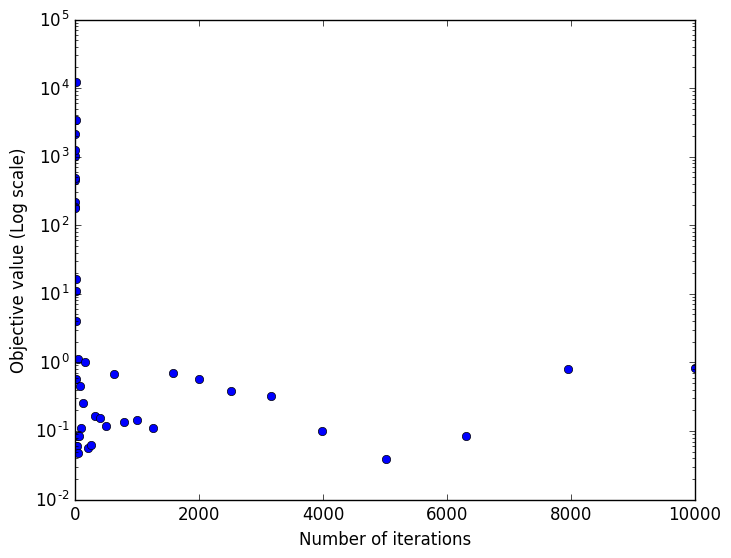

(num_iterations,lastobj) = (10000,0.8239439517850986)


In [28]:
# plot against the number of iterations

for i in collect(0:0.1:4)
    lastobj = prox_stochgrad_sparse(X,y,k, maxiters=convert(Int,round(10^i)), stepsize =0.0004, w = randn(size(X,2))*3, num_samples=10)[2][end]
    semilogy(10^i, lastobj, "bo")
    num_iterations = convert(Int,round(10^i))
    @show num_iterations, lastobj
end
xlabel("Number of iterations");
ylabel("Objective value (Log scale)");


In [29]:
solution_stochastic, objectives = prox_stochgrad_sparse(X,y,k, maxiters=100, stepsize =0.0004, w = rand(size(X,2))*3)
@show solution_stochastic
@show w_true
@show objectives[end]

solution_stochastic = [-4.99025,16.9914,5.04645,0.0281698,0.0547558,-7.02925,4.99355,-0.0423825,-0.035845,0.113806]
w_true = [-5.0,17.0,5.0,0.0,0.0,-7.0,5.0,0.0,0.0,0.1]
objectives[end] = 0.0326296551744709


0.0326296551744709

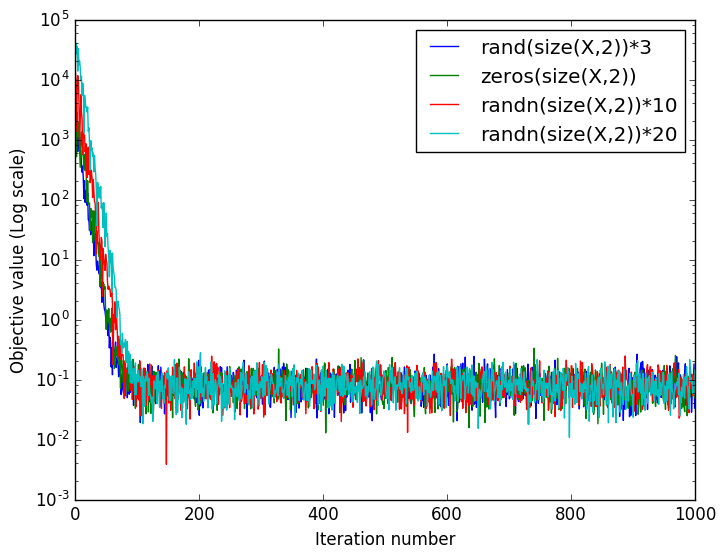

result1[1] = [-5.00626,16.9969,5.00416,-0.0101887,0.000146208,-6.9974,4.99764,-0.0203363,0.00286351,0.103041]
result2[1] = [-5.00595,16.9867,4.99973,-0.0077572,0.000812402,-7.0135,5.00014,-0.00667737,0.00658086,0.0973901]
result3[1] = [-4.99948,16.9983,5.01853,-0.00863007,-0.00280231,-7.00634,4.99902,-0.0143822,-0.00432367,0.10455]
result4[1] = [-5.00653,17.0031,5.00757,-0.00498245,0.00196732,-6.99466,4.99194,-0.00876904,-0.000797481,0.101552]
w_true = [-5.0,17.0,5.0,0.0,0.0,-7.0,5.0,0.0,0.0,0.1]
avg_obj = 0.3460634399589457


0.3460634399589457

In [30]:
# plot against the iteration number, where num samples is 10

result1 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = rand(size(X,2))*3, num_samples=10)
result2 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = zeros(size(X,2)), num_samples=10)
result3 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = randn(size(X,2))*10, num_samples=10)
result4 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = randn(size(X,2))*20, num_samples=10)


semilogy(result1[2],label="rand(size(X,2))*3")
semilogy(result2[2],label="zeros(size(X,2))")
semilogy(result3[2],label="randn(size(X,2))*10")
semilogy(result4[2],label="randn(size(X,2))*20")
xlabel("Iteration number")
ylabel("Objective value (Log scale)")

legend()
@show result1[1]
@show result2[1]
@show result3[1]
@show result4[1]
@show w_true
avg_obj = mean(result1[2][125:end])+mean(result2[2][125:end])+ mean(result3[2][125:end])+mean(result4[2][125:end])
@show avg_obj

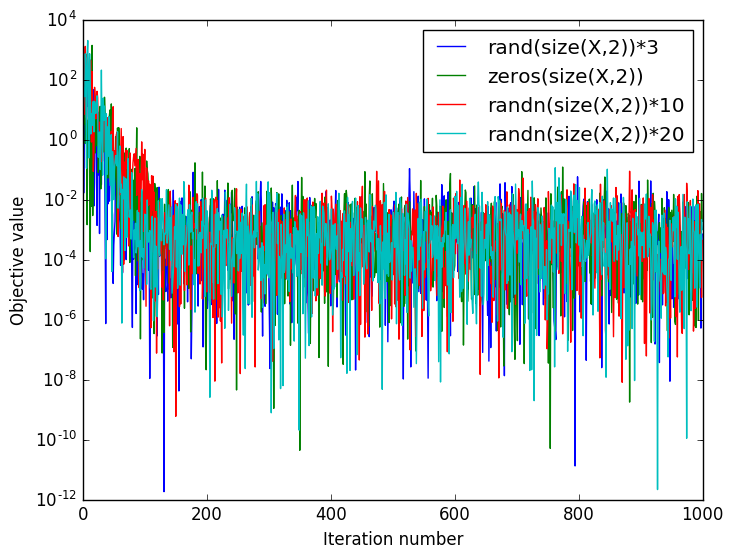

result1[1] = [-5.00771,17.0314,5.03561,-0.0329853,-0.0221661,-6.99581,5.04042,-0.00239362,0.0123639,0.162262]
result2[1] = [-5.01821,17.0009,4.97718,-0.0269992,0.0912098,-6.98579,5.00749,-0.0251932,0.0532016,0.147118]
result3[1] = [-5.03037,17.0312,5.02601,-0.00787881,-0.00401828,-7.04194,5.01984,-0.0177973,-0.0279307,0.137681]
result4[1] = [-4.98537,16.9734,5.02699,0.0293192,0.0317463,-7.01645,4.99809,-0.0120597,-0.0344454,0.112417]
w_true = [-5.0,17.0,5.0,0.0,0.0,-7.0,5.0,0.0,0.0,0.1]
avg_obj = 0.011199781802801284


0.011199781802801284

In [31]:
# plot against the iteration number, where num of samples is 1
xlabel("Iteration number")
ylabel("Objective value")
srand(3)
result1 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = rand(size(X,2))*3, num_samples=1)
result2 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = zeros(size(X,2)), num_samples=1)
result3 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = randn(size(X,2))*10, num_samples=1)
result4 = prox_stochgrad_sparse(X,y,k, maxiters=1000, stepsize =0.00004, w = randn(size(X,2))*20, num_samples=1)

semilogy(result1[2],label="rand(size(X,2))*3")
semilogy(result2[2],label="zeros(size(X,2))")
semilogy(result3[2],label="randn(size(X,2))*10")
semilogy(result4[2],label="randn(size(X,2))*20")

legend()
@show result1[1]
@show result2[1]
@show result3[1]
@show result4[1]
@show w_true
avg_obj = mean(result1[2][125:end])+mean(result2[2][125:end])+ mean(result3[2][125:end])+mean(result4[2][125:end])
@show avg_obj

For stochastic gradient descent, about 125 iterations are needed to converge. This is independent of the starting point of w and the number of samples (batch size) in the mini-batch method.

d) How long does the stochastic proximal gradient method take compared to the
standard proximal gradient method? Compare both the number of iterations and
the time required for convergence.

In [39]:
# using batch stochastic gradient descent where num of samples is 10
@time proxgrad_sparse(X,y,k, maxiters=65,stepsize =0.00004, w = randn(size(X,2))*10)
@time prox_stochgrad_sparse(X,y,k, maxiters=125,stepsize =0.00004, w = randn(size(X,2))*10)


  0.010290 seconds (1.45 k allocations: 12.006 MB)
  0.002616 seconds (3.39 k allocations: 2.375 MB)


([-5.00434,17.0055,5.00032,-0.00186138,0.00468172,-6.99296,5.00696,-0.0127497,-0.00104129,0.101411],[8071.84,6335.22,6570.4,4356.76,2956.65,2340.52,2398.58,2106.39,1751.91,998.533  …  0.130407,0.0646377,0.0326479,0.0452099,0.0562286,0.106794,0.0748248,0.0734983,0.116229,0.0674907])

Stochastic proximal gradient method takes about 4 to 7 times faster than proximal gradient method.

e) Run the algorithm starting at multiple locations and create a histogram of the objective value. What do you observe?

In [58]:
last_objectives = Float64[]
for i in 1:100
    temp = randn(size(X,2))*rand(1:20) # start at different initial weights
    objective = prox_stochgrad_sparse(X,y,k, maxiters=100, stepsize =0.00004, w = temp)[2][end]
    push!(last_objectives, objective)
end
@show mean(last_objectives)

mean(last_objectives) = 0.0939550642043843


0.0939550642043843

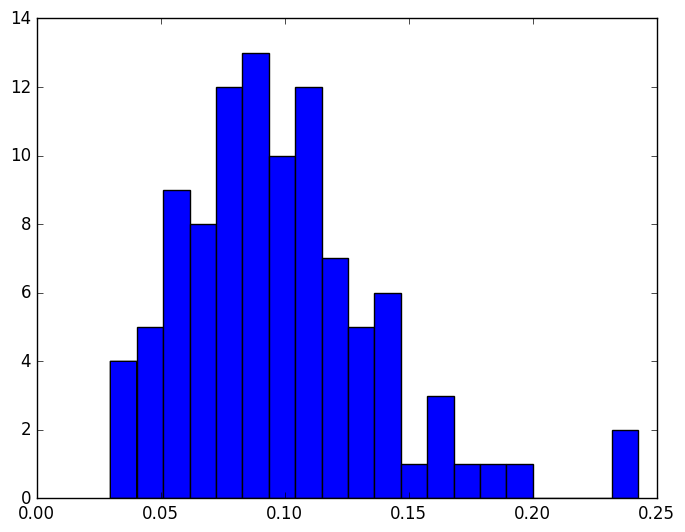

([4.0,5.0,9.0,8.0,12.0,13.0,10.0,12.0,7.0,5.0,6.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0],[0.0296345,0.0402811,0.0509277,0.0615743,0.0722209,0.0828675,0.0935141,0.104161,0.114807,0.125454  …  0.146747,0.157394,0.16804,0.178687,0.189333,0.19998,0.210627,0.221273,0.23192,0.242566],Any[PyObject <matplotlib.patches.Rectangle object at 0x00000000223E4F28>,PyObject <matplotlib.patches.Rectangle object at 0x00000000223E44E0>,PyObject <matplotlib.patches.Rectangle object at 0x00000000223ED400>,PyObject <matplotlib.patches.Rectangle object at 0x00000000223EDA58>,PyObject <matplotlib.patches.Rectangle object at 0x00000000213C6048>,PyObject <matplotlib.patches.Rectangle object at 0x00000000214070B8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000021407240>,PyObject <matplotlib.patches.Rectangle object at 0x00000000223F96D8>,PyObject <matplotlib.patches.Rectangle object at 0x00000000223F96A0>,PyObject <matplotlib.patches.Rectangle object at 0x0000000022400048>,PyObject <matplotlib.patches.

In [41]:
plt[:hist](last_objectives,20)

The objective value is similar regardless of the starting $w^0$.

# Question 4

c) Proximal gradient method

In [42]:
function prox_l2(w)
    return w/3
end

prox_l2 (generic function with 1 method)

In [43]:
#test
prox_l2([4,2,3])

3-element Array{Float64,1}:
 1.33333 
 0.666667
 1.0     

In [101]:
#loss is l1 norm
function proxgrad_l2(X, y; maxiters=100, stepsize=1, w=1)
    objval = Float64[]
    weights = Float64[]
    for i=1:maxiters
        # gradient step
        if (w!=0)
            g = sign(w)
        else 
            g = rand()*2-1 # generates number from -1 to 1
        end
        
        w = w - stepsize*g
        
        # prox step
        w = prox_l2(w)
        
        # record iterate values
        push!(weights,w)
        push!(objval, norm(w,1)+norm(w,2)^2) 
    end
    return weights, objval
end


proxgrad_l2 (generic function with 1 method)

Any, Any) in module Main at In[44]:3 overwritten at In[101]:3.


In [102]:
# Generate data
X_l2 = 1
y_l2 = 0
w_true_l2 = X_l2\y_l2 #0

0.0

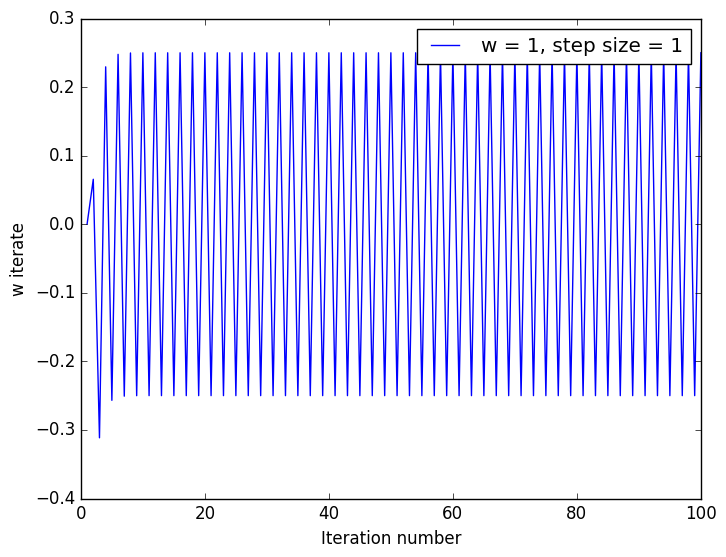

solutions_l2 = [0.0,0.0655414,-0.311486,0.229505,-0.256832,0.247723,-0.250759,0.249747,-0.250084,0.249972,-0.250009,0.249997,-0.250001,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25]
objval = [0.0,0.0698371,0.40851,0.282177,0.322794,0.309089,0.313639,0.312121,0.312627,0.312458,0.312514,0.312495,0.312502,0.312499,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3

100-element Array{Float64,1}:
 0.0      
 0.0698371
 0.40851  
 0.282177 
 0.322794 
 0.309089 
 0.313639 
 0.312121 
 0.312627 
 0.312458 
 0.312514 
 0.312495 
 0.312502 
 ⋮        
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   
 0.3125   

In [103]:
solutions_l2, objval = proxgrad_l2(X_l2, y_l2, stepsize = 1);
plot(1:100, solutions_l2, label="w = 1, step size = 1")
xlabel("Iteration number")
ylabel("w iterate")
legend();
@show solutions_l2
@show objval # objective converges to 0.25

With a step size of 1, and a $w^0$ of 1, the iterates oscillate around 0.

d) Do the above using different step sizes and starting points.


Oscillates less with a smaller step size:

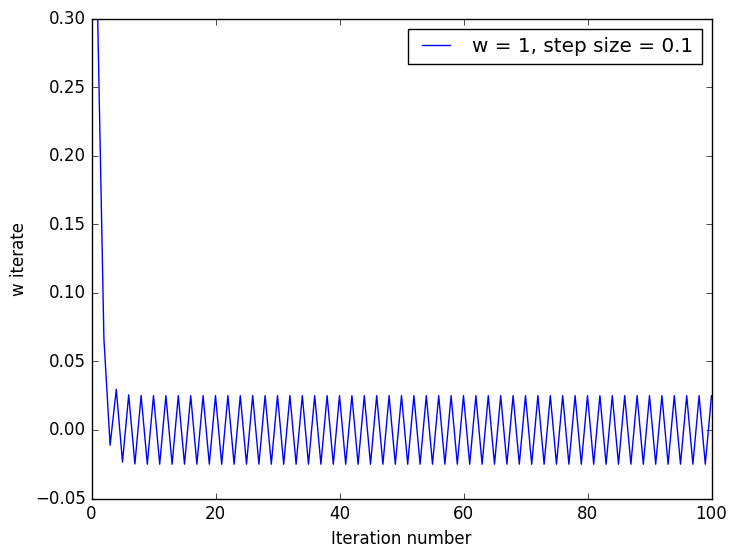

solutions_l2 = [0.3,0.0666667,-0.0111111,0.0296296,-0.0234568,0.0255144,-0.0248285,0.0250572,-0.0249809,0.0250064,-0.0249979,0.0250007,-0.0249998,0.0250001,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025,-0.025,0.025]
(proxgrad_l2(X_l2,y_l2,stepsize=0.1,w=1))[2] = [0.39,0.0711111,0.0112346,0.0305075,0.024007,0.0261654,0.025445,0.025685,0.025605,0.0256317,0.0256228,0.0256257,0.0256248,0.0256251,0.025625,0.025625,0.025625,0.025625,0.025625,0.025625,0.025625,0.025625,0.025625,0.025625,0.025625,0.0256

100-element Array{Float64,1}:
 0.39     
 0.0711111
 0.0112346
 0.0305075
 0.024007 
 0.0261654
 0.025445 
 0.025685 
 0.025605 
 0.0256317
 0.0256228
 0.0256257
 0.0256248
 ⋮        
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 
 0.025625 

In [109]:
solutions_l2, objval = proxgrad_l2(X_l2, y_l2, stepsize = 0.1, w=1);

plot(1:100, solutions_l2, label="w = 1, step size = 0.1")
xlabel("Iteration number")
ylabel("w iterate")
legend();
@show solutions_l2
@show proxgrad_l2(X_l2, y_l2, stepsize=0.1, w=1)[2]; # objective converges to 0.025

Oscillates a lot when step size is too large.

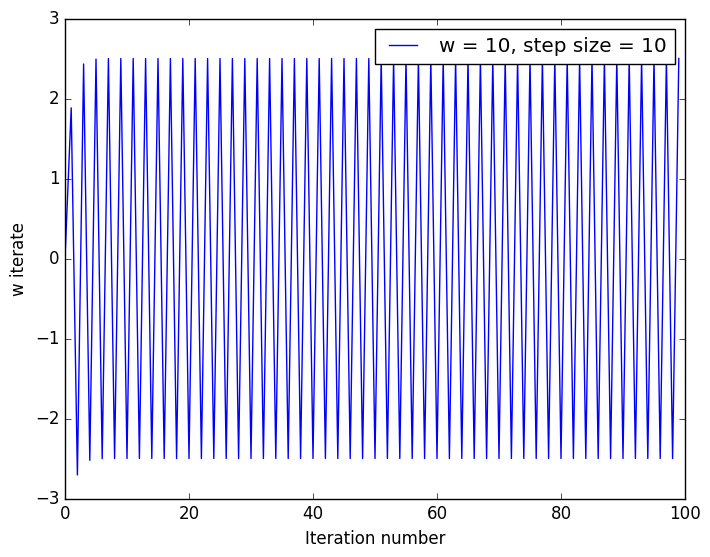

(proxgrad_l2(X_l2,y_l2,stepsize=10,w=10))[1] = [0.0,0.988116,-3.00396,2.33201,-2.556,2.48133,-2.50622,2.49793,-2.50069,2.49977,-2.50008,2.49997,-2.50001,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5]
(proxgrad_l2(X_l2,y_l2,stepsize=10,w=10))[2] = [0.0,2.85984,11.3929,7.94453,9.02688,8.65864,8.78056,8.73983,8.75339,8.74887,8.75038,8.74987,8.75004,8.74999,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75,8.75

100-element Array{Float64,1}:
  0.0    
  2.85984
 11.3929 
  7.94453
  9.02688
  8.65864
  8.78056
  8.73983
  8.75339
  8.74887
  8.75038
  8.74987
  8.75004
  ⋮      
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   
  8.75   

In [105]:
# using different step sizes and starting points
plot(proxgrad_l2(X_l2, y_l2, stepsize=10, w=10)[1], label = "w = 10, step size = 10")
xlabel("Iteration number")
ylabel("w iterate")
legend();

@show proxgrad_l2(X_l2, y_l2, stepsize=10, w=10)[1]; 
@show proxgrad_l2(X_l2, y_l2, stepsize=10, w=10)[2]; # objetive converges to 2.5

e) Do you see a problem with the proximal gradient method for this function? How would you fix it?

The weight iterates are noisy with different step size and initial $w^0$. They oscillate around a mean of 0. The amount of oscillation depends on the step size.

Use a decreasing step size. It still oscillates around 0, but less.

In [106]:
#loss is l1 norm
function proxgrad_l2_revised(X, y; maxiters=100, stepsize=1, w=1)
    objval = Float64[]
    weights = Float64[]
    for i=1:maxiters
        # gradient step
        if (w!=0)
            g = sign(w)
        else 
            g = rand()*2-1 # generates number from -1 to 1
        end
        
        w = w - stepsize*g
        
        # prox step
        w = prox_l2(w)
        
        # record iterate values
        push!(weights,w)
        push!(objval, norm(w,1)) 
        
        #decreasing step size
        if (i!=1)
            if (objval[i]>objval[i-1])
            stepsize *= 0.7
            end
        end
    end

    
    return weights, objval
end


proxgrad_l2_revised (generic function with 1 method)

) in module Main at In[68]:3 overwritten at In[106]:3.


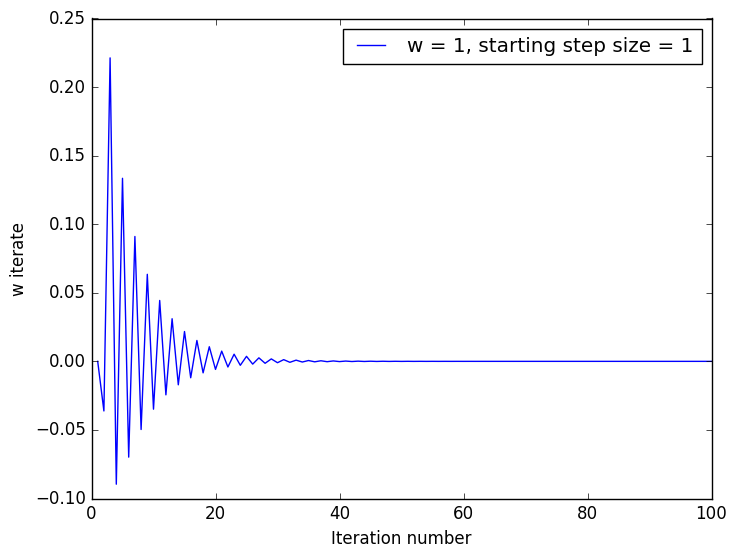

solutions_l2 = [0.0,-0.0361636,0.221279,-0.0895737,0.133475,-0.0698415,0.0910528,-0.0496824,0.0634725,-0.0348658,0.0444014,-0.0244159,0.0310777,-0.0170922,0.021754,-0.0119647,0.0152278,-0.00837527,0.0106594,-0.00586269,0.00746161,-0.00410389,0.00522313,-0.00287272,0.00365619,-0.0020109,0.00255933,-0.00140763,0.00179153,-0.000985343,0.00125407,-0.00068974,0.000877851,-0.000482818,0.000614496,-0.000337973,0.000430147,-0.000236581,0.000301103,-0.000165607,0.000210772,-0.000115925,0.00014754,-8.11472e-5,0.000103278,-5.68031e-5,7.22948e-5,-3.97621e-5,5.06064e-5,-2.78335e-5,3.54245e-5,-1.94834e-5,2.47971e-5,-1.36384e-5,1.7358e-5,-9.54689e-6,1.21506e-5,-6.68282e-6,8.50541e-6,-4.67798e-6,5.95379e-6,-3.27458e-6,4.16765e-6,-2.29221e-6,2.91736e-6,-1.60455e-6,2.04215e-6,-1.12318e-6,1.4295e-6,-7.86227e-7,1.00065e-6,-5.50359e-7,7.00457e-7,-3.85251e-7,4.9032e-7,-2.69676e-7,3.43224e-7,-1.88773e-7,2.40257e-7,-1.32141e-7,1.6818e-7,-9.24989e-8,1.17726e-7,-6.47492e-8,8.24081e-8,-4.53244e-8,5.76857e-8,-3.1

100-element Array{Float64,1}:
  0.0       
 -0.0361636 
  0.221279  
 -0.0895737 
  0.133475  
 -0.0698415 
  0.0910528 
 -0.0496824 
  0.0634725 
 -0.0348658 
  0.0444014 
 -0.0244159 
  0.0310777 
  ⋮         
  4.038e-8  
 -2.2209e-8 
  2.8266e-8 
 -1.55463e-8
  1.97862e-8
 -1.08824e-8
  1.38503e-8
 -7.61768e-9
  9.69523e-9
 -5.33238e-9
  6.78666e-9
 -3.73266e-9

In [108]:
solutions_l2, objval = proxgrad_l2_revised(X_l2, y_l2, stepsize = 1);
@show solutions_l2
plot(1:100, solutions_l2, label="w = 1, starting step size = 1")
xlabel("Iteration number")
ylabel("w iterate")
legend();
@show solutions_l2

